### Hariharan Kalimuthu
### 2020115015

#### Reliability Assignment

##### Question 1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import q1data.csv as a pandas dataframe
df = pd.read_csv('q1data.csv')
df.head()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,2,-1,-1,-1,-1,-1,4,-2,3,-2,...,1,0,-1,1,-4,-1,2,1,-2,4
1,-3,-2,-2,-3,-3,-4,-4,-2,-1,-3,...,-2,-1,-2,-2,-1,-1,-4,-1,-4,-1
2,2,3,1,0,-1,-1,2,-1,2,3,...,1,0,0,2,-1,2,-1,0,3,4
3,3,1,-1,-2,-1,-1,-4,-2,-3,0,...,2,0,0,1,-1,1,-1,-1,1,1
4,-2,3,-1,1,-1,1,-2,1,3,2,...,2,0,-1,2,1,2,-2,1,2,3


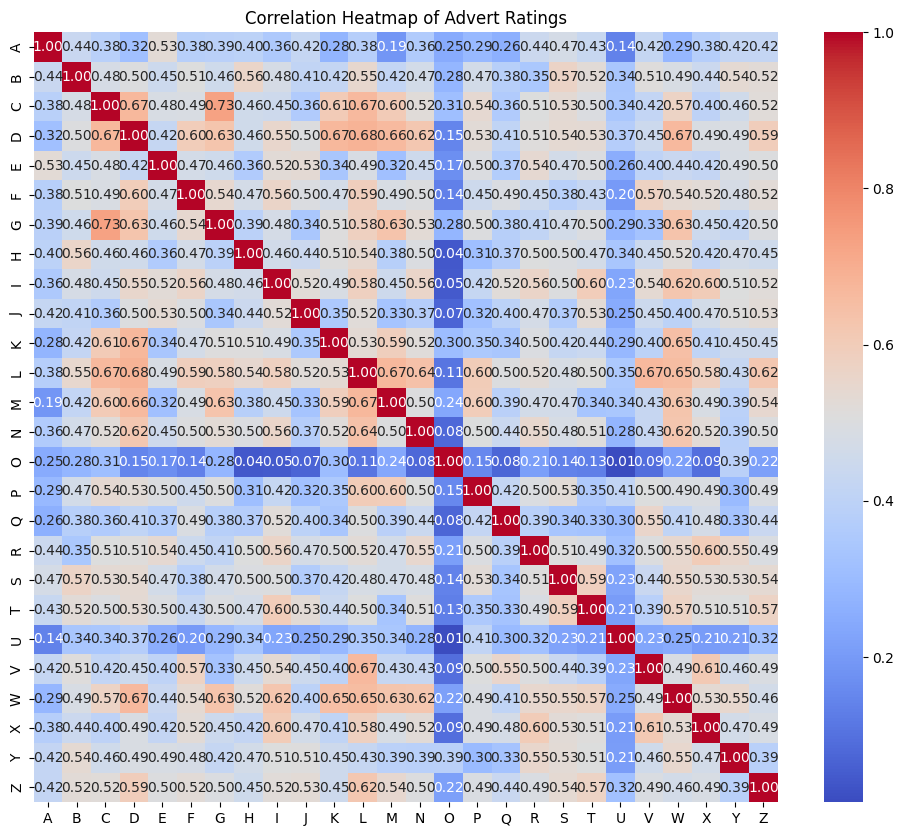

In [6]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Advert Ratings')
plt.show()

Now, if a participant had made random ratings, we would expect the correlation between the ratings to be close to 0. Hence, the mean of the absolute values of correlations between the person who rated randomly and the others should ideally be the lowest, as there wouldn't be any strongly positive or strongly negative correlations of the random rater.


In [7]:
# calculate the mean of the absolute values of correlations for each column
mean_corr = np.abs(corr_matrix).mean(axis=0)
mean_corr

A    0.385969
B    0.482304
C    0.514604
D    0.538891
E    0.456477
F    0.490640
G    0.493497
H    0.453248
I    0.505283
J    0.437580
K    0.472085
L    0.555878
M    0.483027
N    0.493915
O    0.199568
P    0.462734
Q    0.410257
R    0.495683
S    0.482357
T    0.478174
U    0.296747
V    0.470284
W    0.529803
X    0.484479
Y    0.465537
Z    0.503806
dtype: float64

In [8]:
min_mean_corr = mean_corr.idxmin()
min_mean_corr_value = mean_corr.min()
print(f'The minimum mean correlation value is {min_mean_corr_value}, and it corresponds to the rater {min_mean_corr}.')

The minimum mean correlation value is 0.19956783530913091, and it corresponds to the rater O.


/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


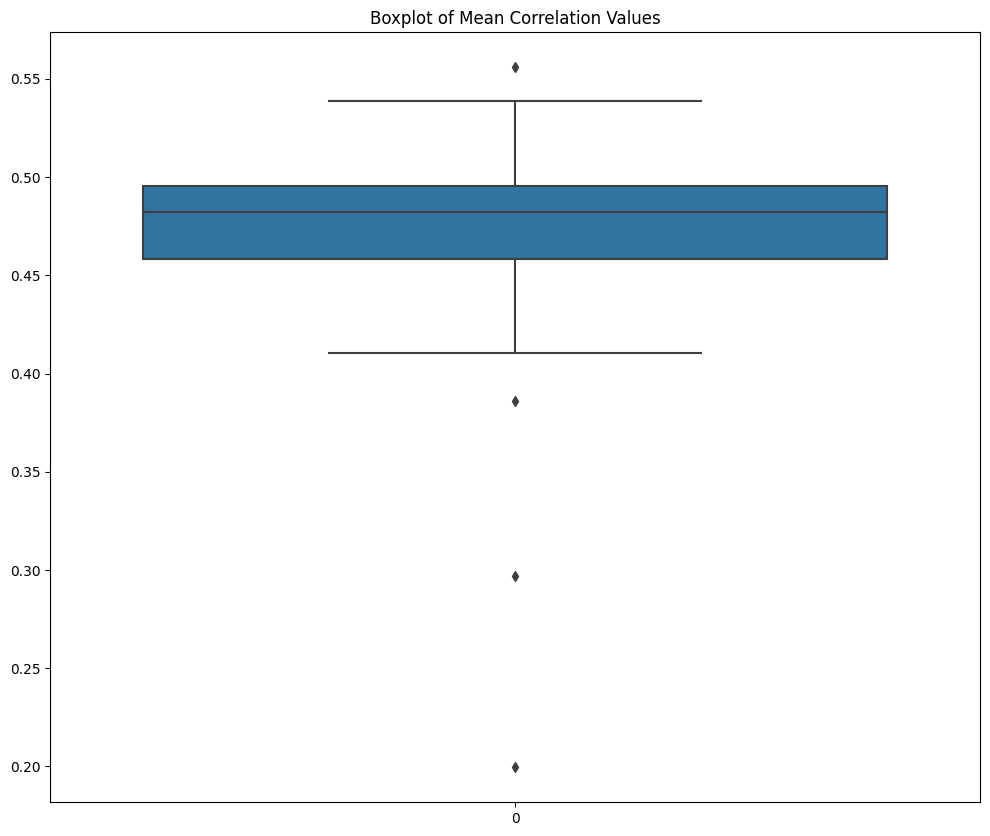

In [9]:
# make a boxplot of the mean absolute correlation values
plt.figure(figsize=(12, 10))
sns.boxplot(mean_corr)
plt.title('Boxplot of Mean Correlation Values')
plt.show()

From the values of correlation matrix and the heatmap, we can conclude that the person who was most likely to give out random ratings to the adverts was 'O'. This is because 'O' has the least mean of absolute values of correlation with others raters, suggesting that his ratings were the least correlated (either positively or negatively) with all other raters on an average, as expected out of a random rating procedure.

Visually, we can see that the colours in the heatmap for 'O' strongest shades of blue, indicating the weak correlation with other raters. 

In [10]:
df = pd.read_csv('q2data.csv')
df.head()

,JS1,JS2,JS3,JS4,JSAVG,JP1,JP2,JP3,JP4,JPAVG
0,9,9.5,9.75,7.875,9.03125,1,1.5,1.75,4.875,2.28125
1,5,6.5,6.25,7.125,6.21875,6,4.0,4.00,7.000,5.25000
2,4,5.0,3.50,6.750,4.81250,5,6.5,5.25,4.625,5.34375
3,6,7.0,5.50,4.750,5.81250,6,7.0,8.50,8.250,7.43750
4,7,7.5,6.75,7.375,7.15625,6,5.0,4.50,9.250,6.18750


As stated in the paper, "Gliem, Joseph & Gliem, Rosemary. (2003). Calculating, Interpreting, And Reporting Cronbach’s Alpha Reliability Coefficient For Likert-Type Scales." 2003 Midwest Research to Practice Conference in Adult, Continuing, and Community Education. The formula relating the mean of correlation values(r) and the number of items(k) to cronbach's alpha (α)

### α = rk / [1 + (k -1) r]

In [11]:
def calculate_mean_corr(corr_matrix):    
    num = 0
    sum = 0
    for i in range(4):
        for j in range(i+1, 4):
            num += 1
            sum+= corr_matrix.iloc[i, j]

    print(f'The mean correlation value is {sum/num}.')

    return sum/num

def cronbach_alpha(r, k):
    return r*k/(1+ ((k-1)*r) )

Chronbach's Alpha for Job Satisfaction

In [12]:
JSdf = df.iloc[:, :4]
JSdf.head()
corr_matrix = JSdf.corr(method='spearman')
corr_matrix

,JS1,JS2,JS3,JS4
JS1,1.000000,0.824366,0.532531,0.373851
JS2,0.824366,1.000000,0.715501,0.517486
JS3,0.532531,0.715501,1.000000,0.651675
JS4,0.373851,0.517486,0.651675,1.000000


In [13]:
mean_corr = calculate_mean_corr(corr_matrix)
print(f'The chronbach\'s alpha value for the items measuring job satisfaction is {cronbach_alpha(mean_corr,corr_matrix.shape[0])}.')

The mean correlation value is 0.6025684054632915.
The chronbach's alpha value for the items measuring job satisfaction is 0.8584496719182925.


Chronbach's Alpha for Job Performance

In [14]:
# make another variable JPdf that contains the columns 6-9 of df
JPdf = df.iloc[:, 5:9]
JPdf.head()
corr_matrix = JPdf.corr(method='spearman')
corr_matrix

,JP1,JP2,JP3,JP4
JP1,1.000000,0.536630,0.127395,-0.010899
JP2,0.536630,1.000000,0.458866,0.038797
JP3,0.127395,0.458866,1.000000,0.145061
JP4,-0.010899,0.038797,0.145061,1.000000


In [15]:
mean_corr = calculate_mean_corr(corr_matrix)
print(f'The chronbach\'s alpha value for the items measuring job performance is {cronbach_alpha(mean_corr,corr_matrix.shape[0])}.')

The mean correlation value is 0.21597505470509304.
The chronbach's alpha value for the items measuring job performance is 0.5242351034090641.


### Observations and Inferences
Cronbach's alpha is a measure of internal consistency reliability, which indicates how well the items in a scale or questionnaire correlate with each other. Typically, higher values of Cronbach's alpha indicate greater internal consistency among the items. 

- Job Satisfaction (JS):
The Cronbach's alpha value for the items measuring job satisfaction (JS) is 0.858, which is relatively high. This suggests that the items in the job satisfaction questionnaire are highly correlated with each other, indicating good internal consistency. In other words, the items within the job satisfaction questionnaire tend to measure the same underlying construct consistently. This suggests that the questionnaire items are reliable in measuring job satisfaction among participants.

- Job Performance (JP):
The Cronbach's alpha value for the items measuring job performance (JP) is 0.524, which is lower compared to the Cronbach's alpha for job satisfaction. While a Cronbach's alpha of 0.524 still indicates some level of internal consistency among the items, it is lower than desirable. This suggests that the items within the job performance questionnaire may not be as strongly correlated with each other compared to the job satisfaction questionnaire. It's possible that the items in the job performance questionnaire may not fully capture the same underlying construct consistently, leading to lower internal consistency.

Hence, the job satisfaction questionnaire demonstrates good internal consistency and reliability. However, the job performance questionnaire shows lower internal consistency and reliability. Now, based off the following table, we can see that we can label the reliablity level of JS questionaire to be Good and that of JP to be Poor.

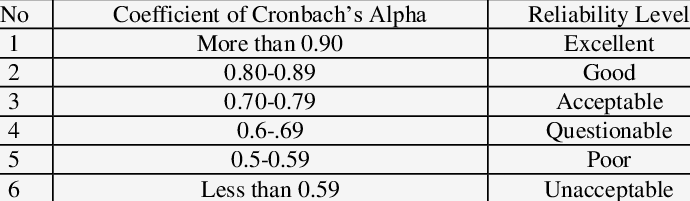



### Question 3

#### 1. Exploratory Analysis, and Normality Testing

In [16]:
# load the data from q3data.csv
df = pd.read_csv('q3data.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


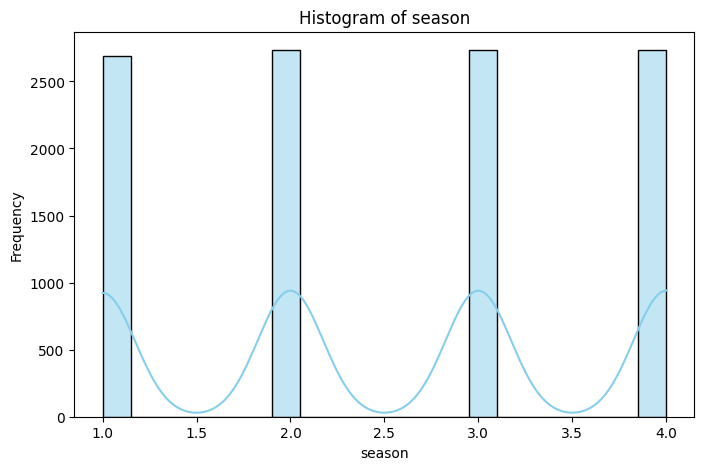

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


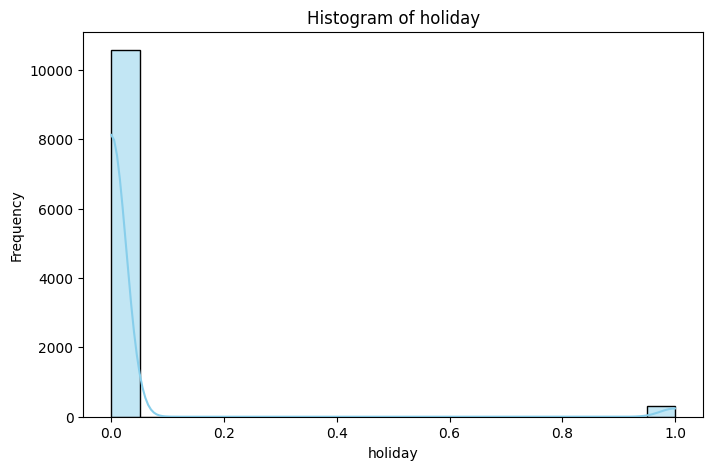

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


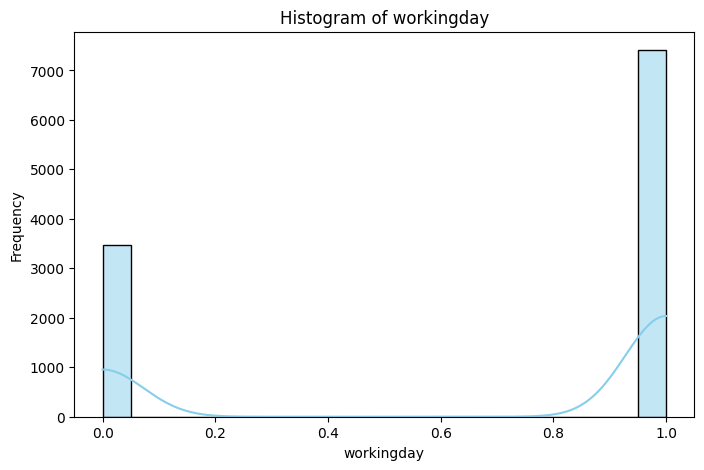

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


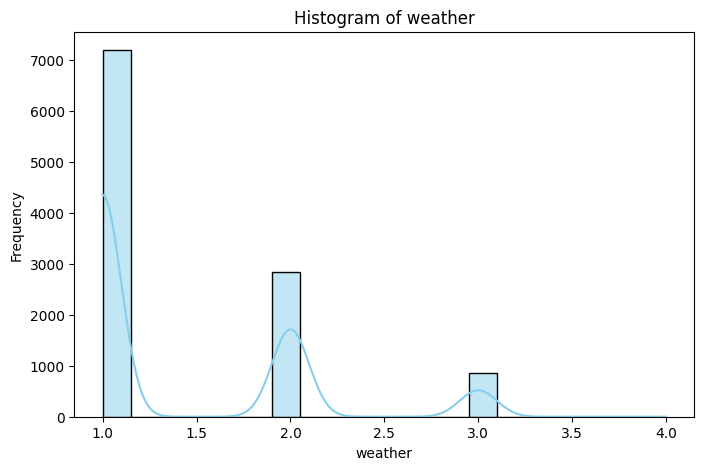

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


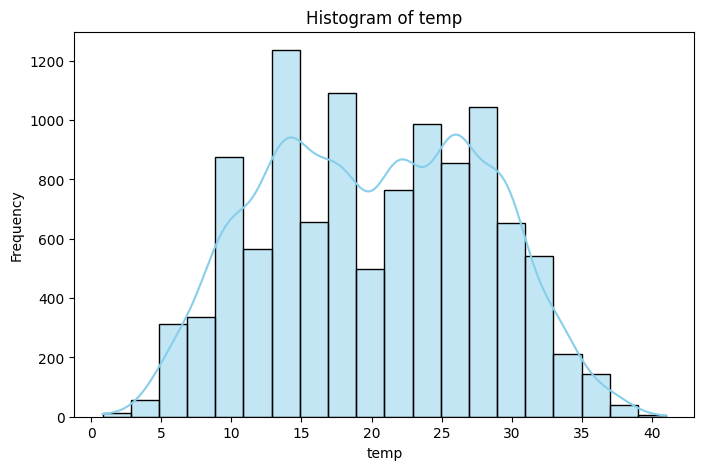

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


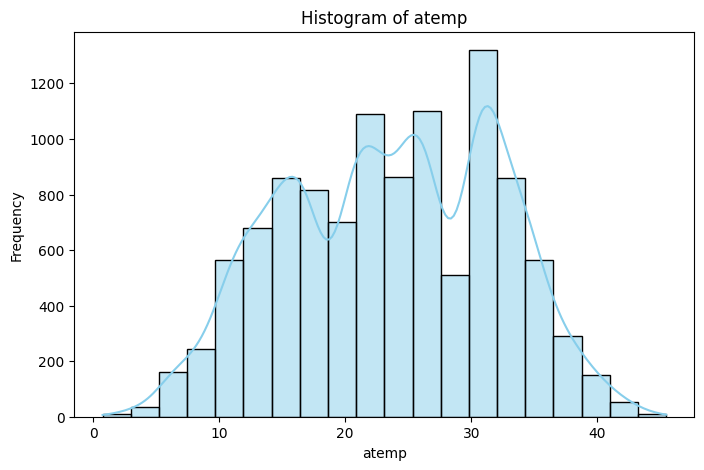

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


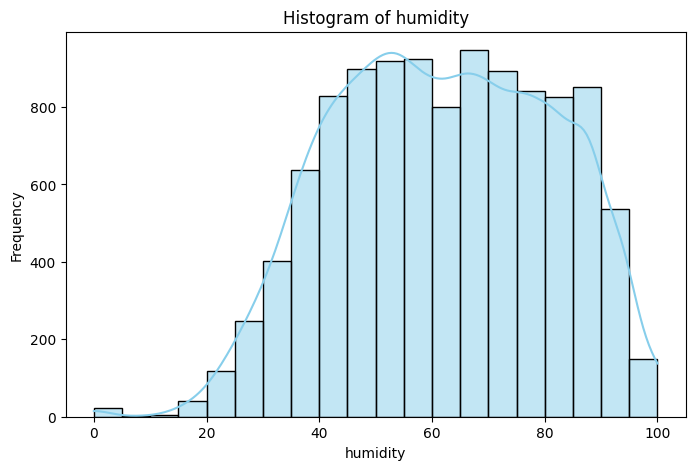

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


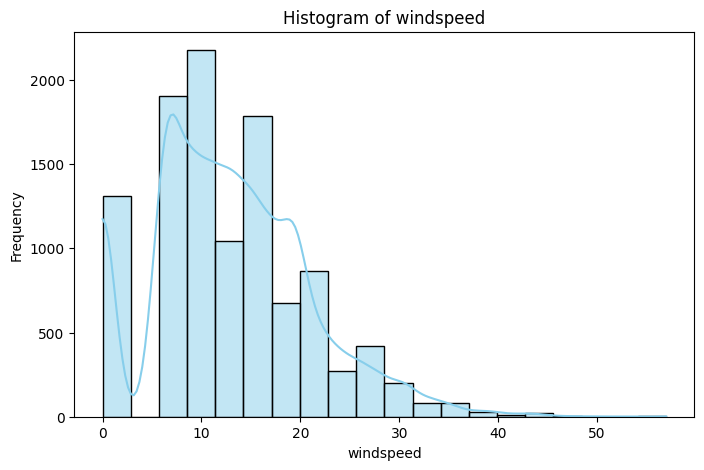

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


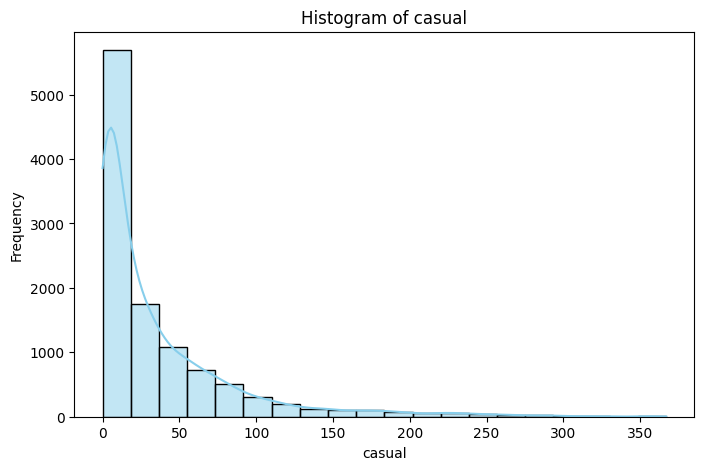

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


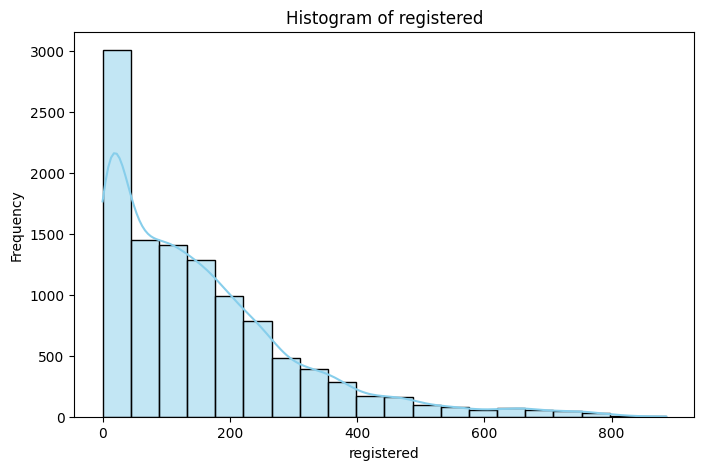

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


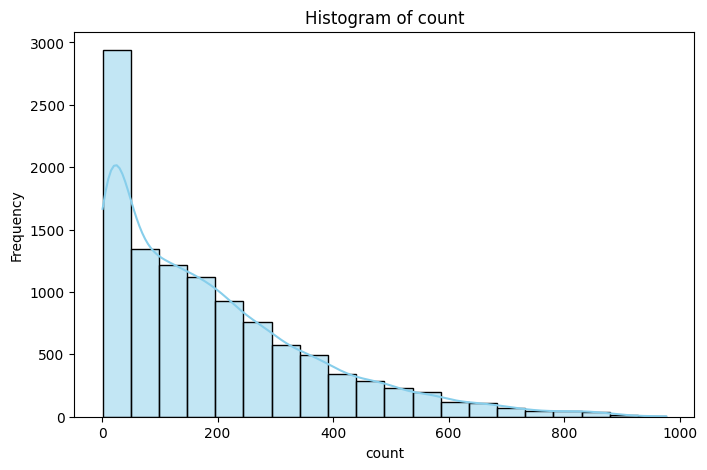

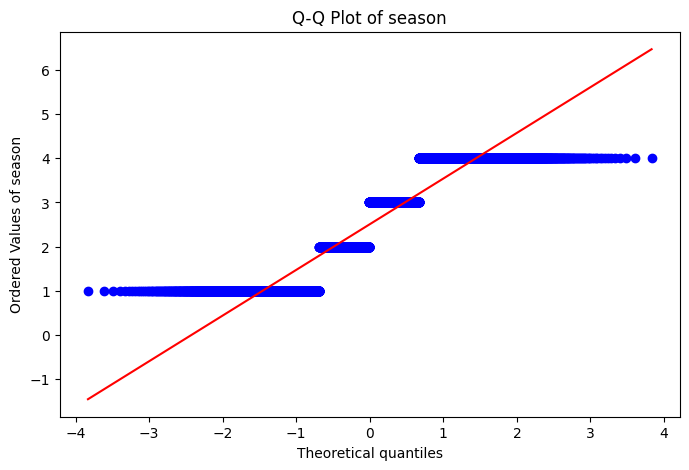

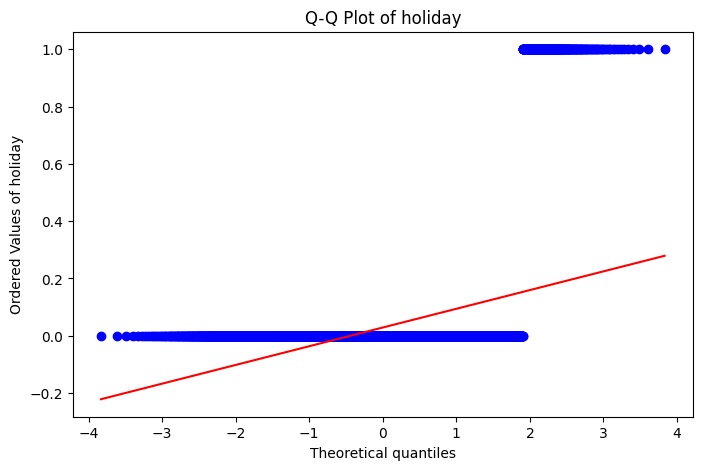

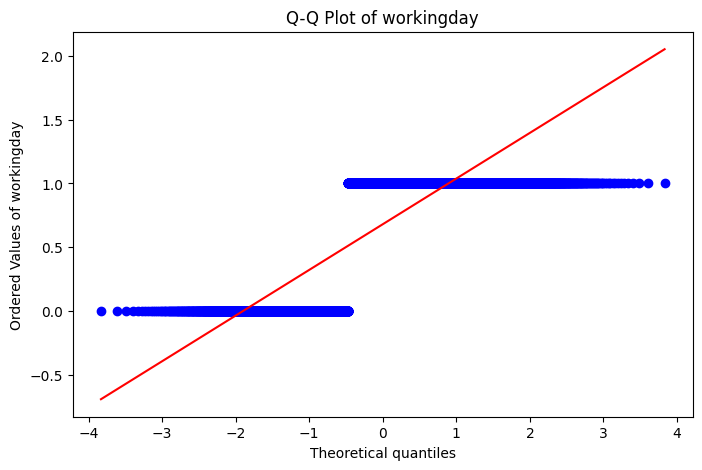

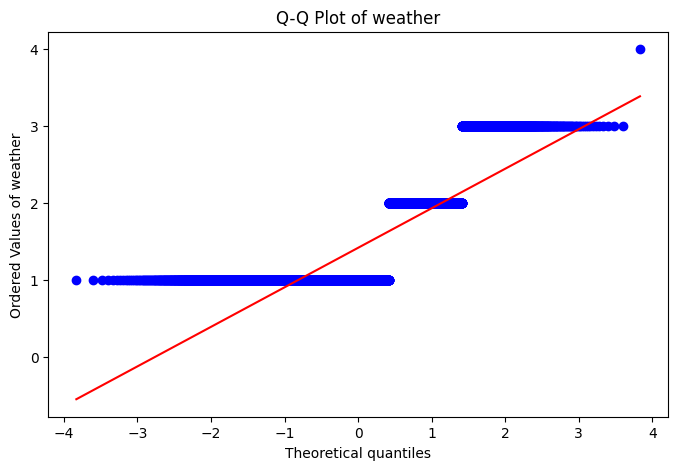

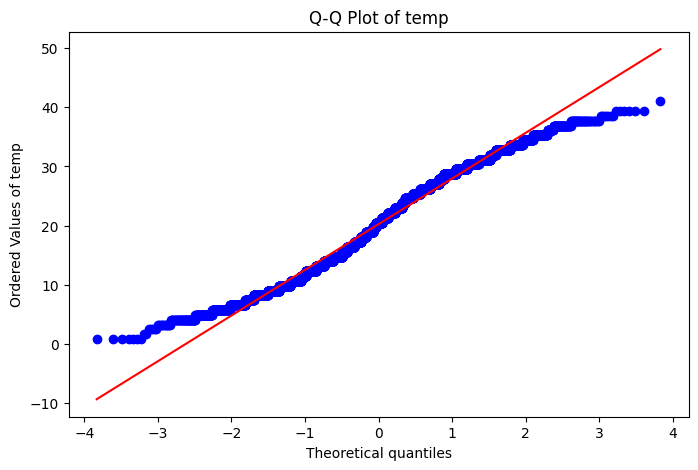

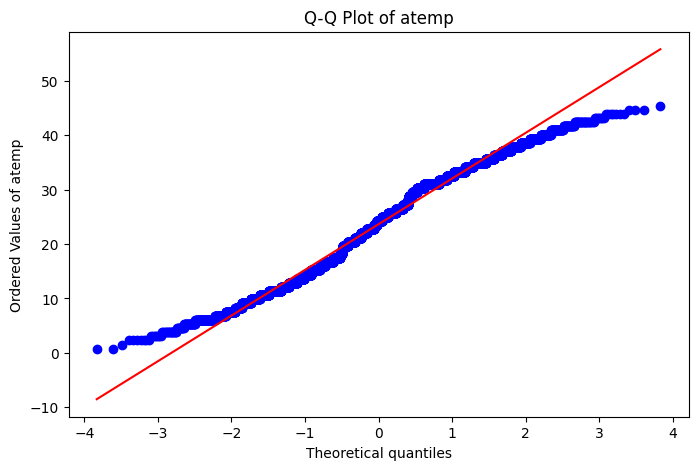

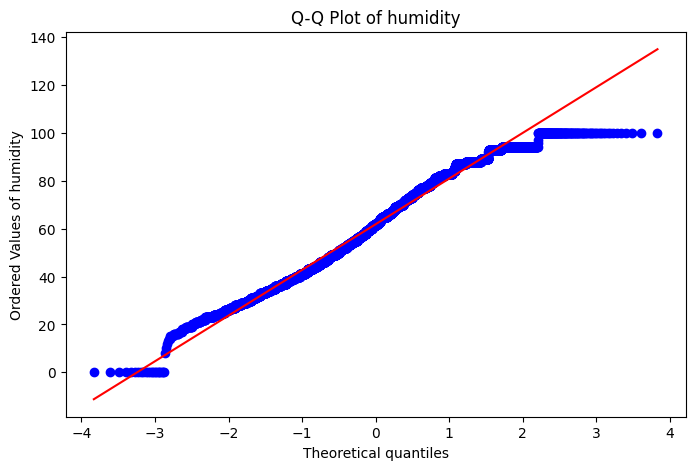

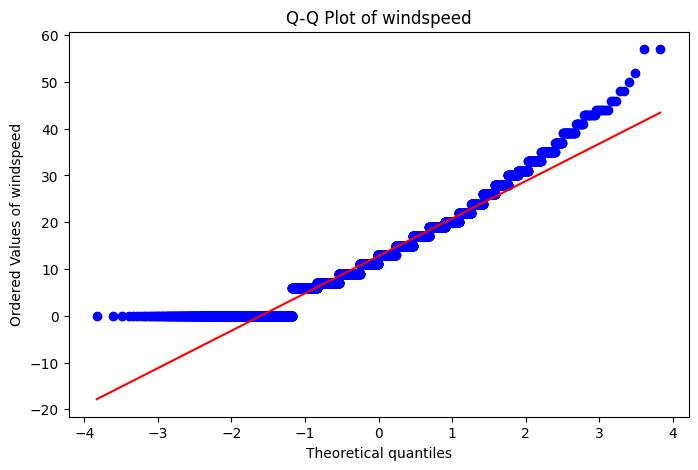

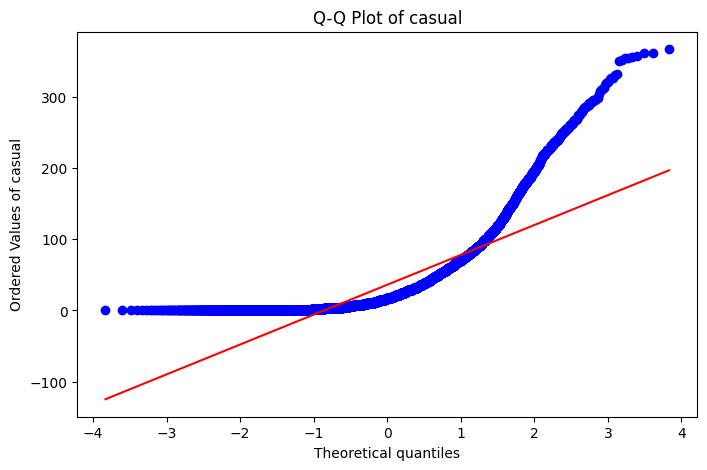

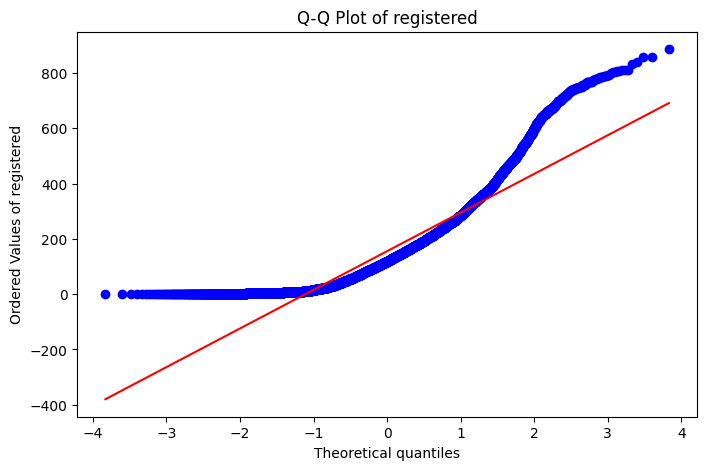

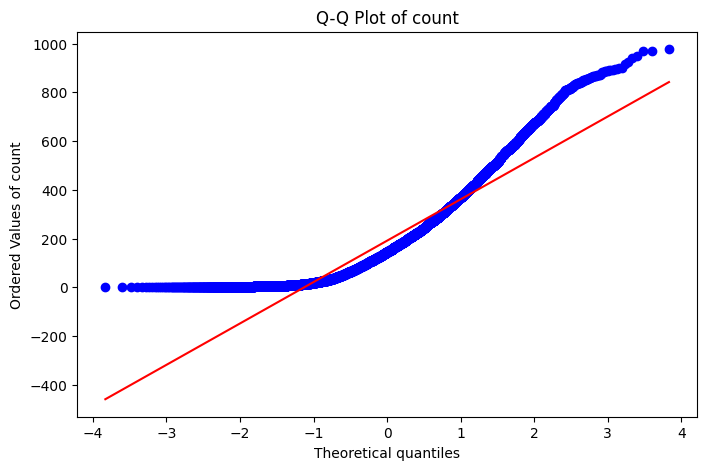

Shapiro-Wilk test for season: p-value=0.0
season is not normally distributed

Shapiro-Wilk test for holiday: p-value=0.0
holiday is not normally distributed

Shapiro-Wilk test for workingday: p-value=0.0
workingday is not normally distributed

Shapiro-Wilk test for weather: p-value=0.0
weather is not normally distributed

Shapiro-Wilk test for temp: p-value=4.581396320636487e-36
temp is not normally distributed

Shapiro-Wilk test for atemp: p-value=3.3570672250420043e-35
atemp is not normally distributed

Shapiro-Wilk test for humidity: p-value=1.2437889654838796e-34
humidity is not normally distributed

Shapiro-Wilk test for windspeed: p-value=0.0
windspeed is not normally distributed

Shapiro-Wilk test for casual: p-value=0.0
casual is not normally distributed

Shapiro-Wilk test for registered: p-value=0.0
registered is not normally distributed

Shapiro-Wilk test for count: p-value=0.0
count is not normally distributed



/Users/hari/Library/Python/3.9/lib/python/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from scipy.stats import shapiro
from scipy.stats import shapiro, probplot

# Select numerical columns for analysis
numerical_cols = ['season',	'holiday',	'workingday',	'weather',	'temp',	'atemp',	'humidity',	'windspeed',	'casual',	'registered',	'count']

# Plot histograms for each numerical variable
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Generate Q-Q plots for each numerical variable
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel(f'Ordered Values of {col}')
    plt.show()

# Perform Shapiro-Wilk test for each numerical variable
for col in numerical_cols:
    stat, p = shapiro(df[col])
    print(f'Shapiro-Wilk test for {col}: p-value={p}')
    if p > 0.05:
        print(f'{col} is normally distributed\n')
    else:
        print(f'{col} is not normally distributed\n')

As we observe from the Shapiro-Wilk test, none of the variables are normally distributed as the p values are far lesser than 0.05 in all the cases. However, the library does warn that the results may not be accurate for datapoints >5000. 

Even after reducing the dataset, similar results were obtained for the Shapiro-Wilk test. Hence, we can conclude that none of the variables are indeed normally distributed. However, the q-q plots and the histograms do give us an indea to the extent of how far or close from normal distribution the varibles are. (For e.g. Humidity, Temperature and Weather do seem to be the closest amongst all the variables to having a normal distribution).


/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


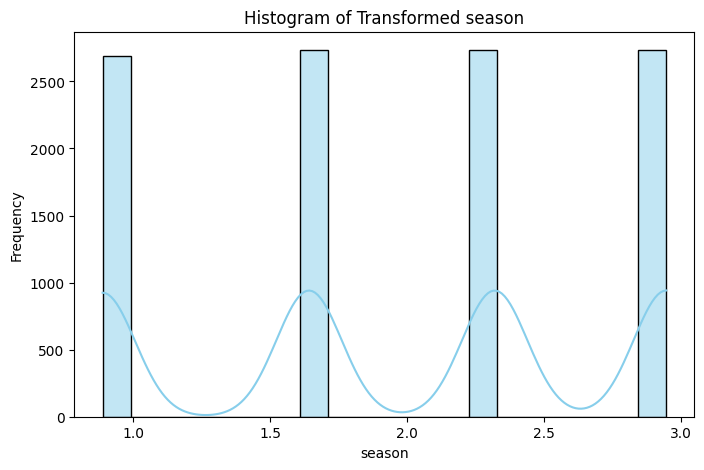

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


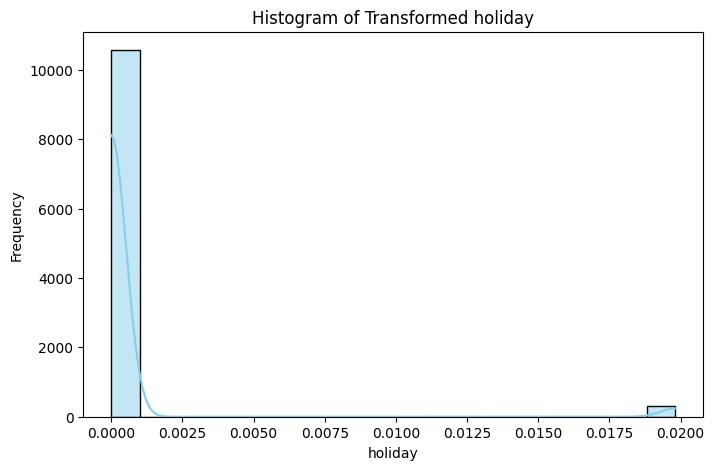

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


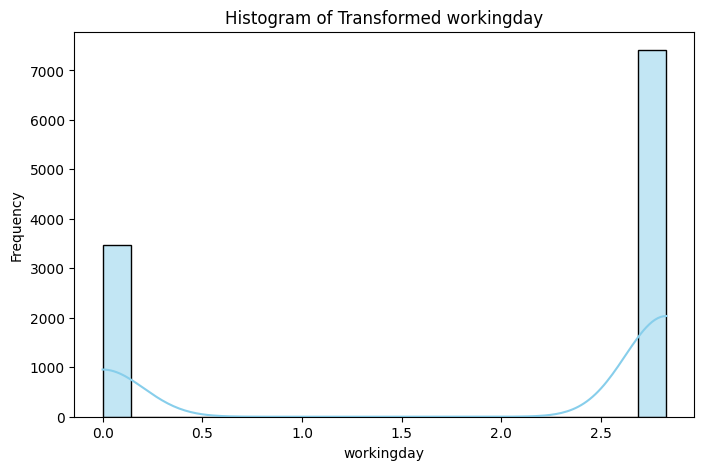

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


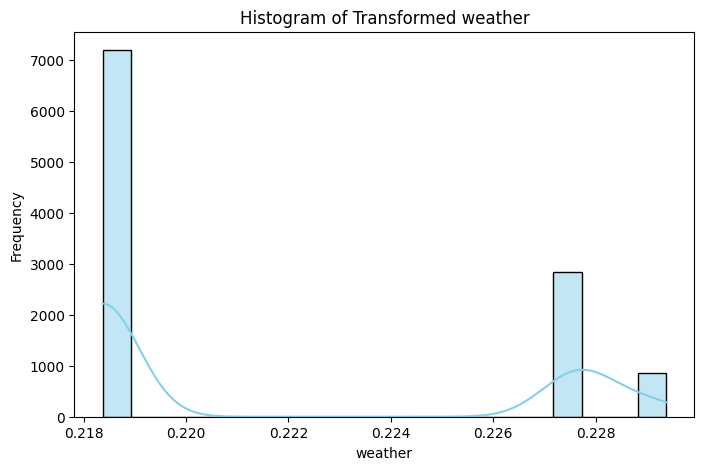

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


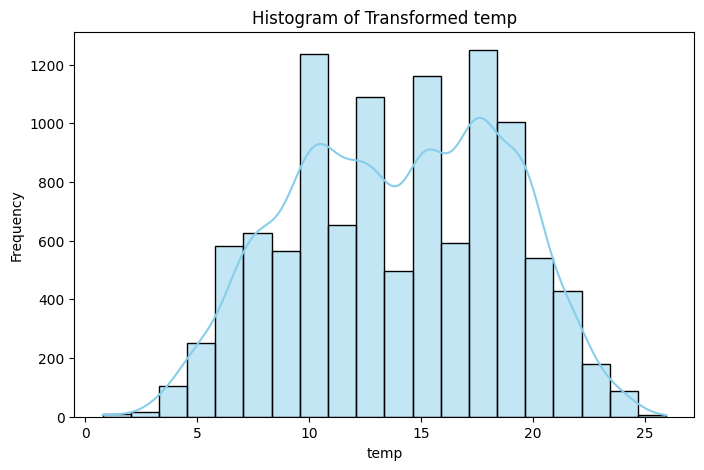

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


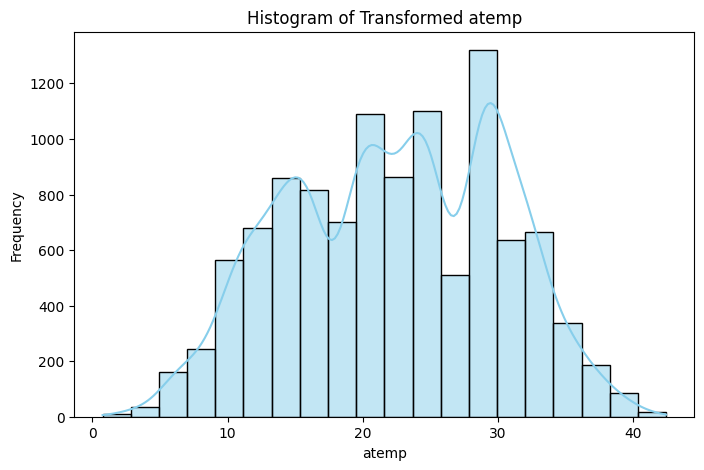

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


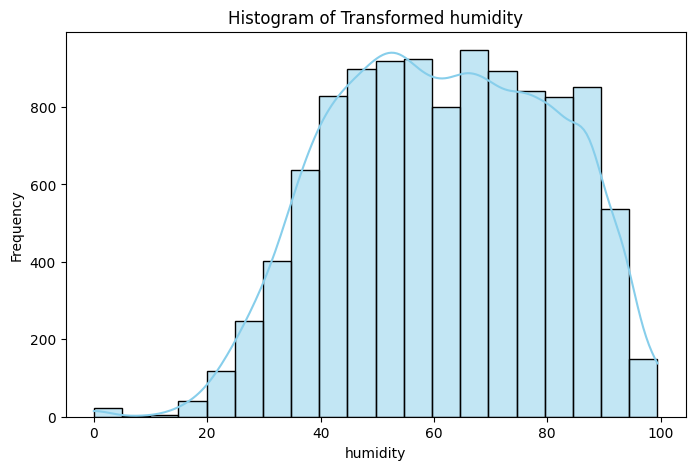

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


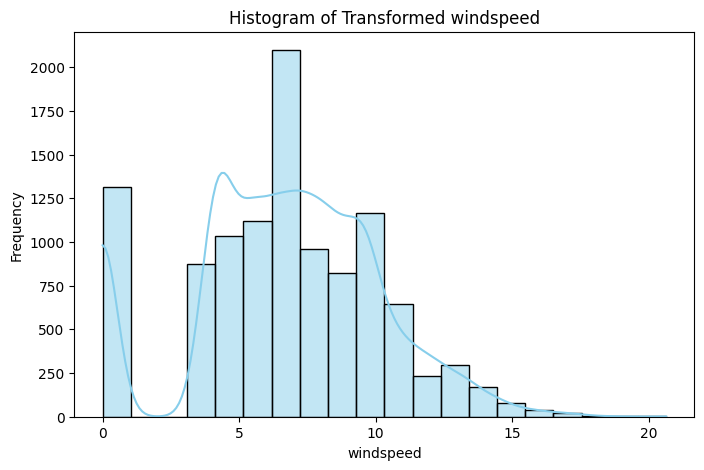

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


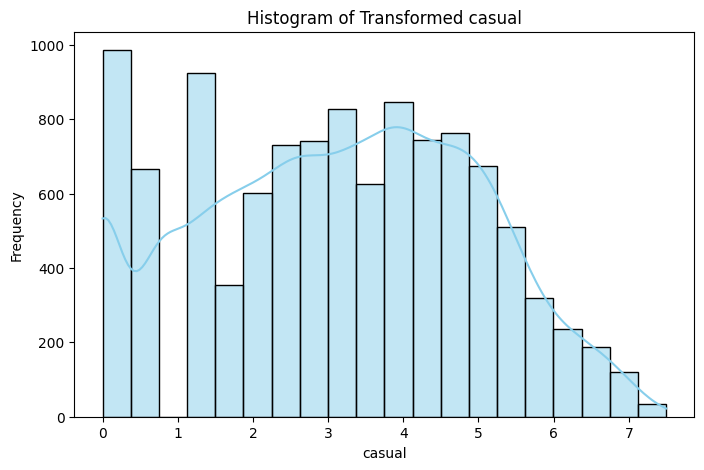

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


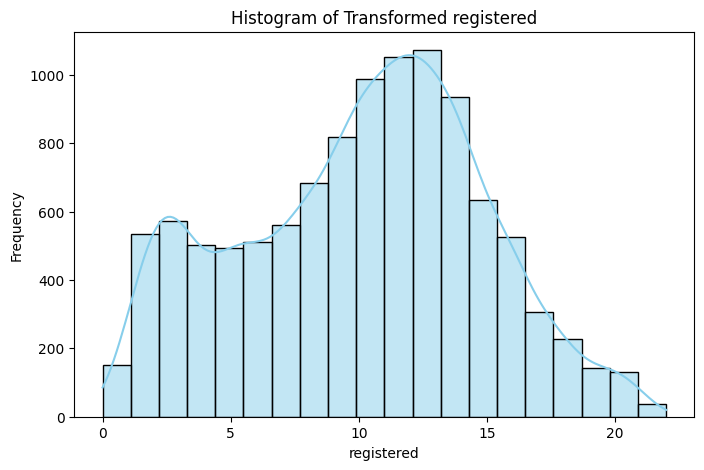

/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hari/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


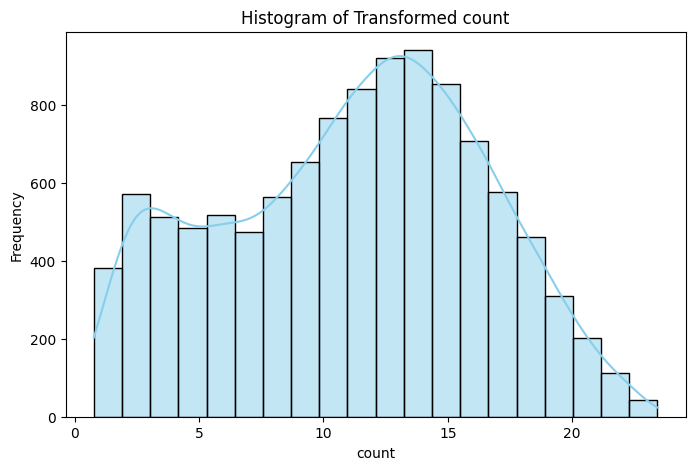

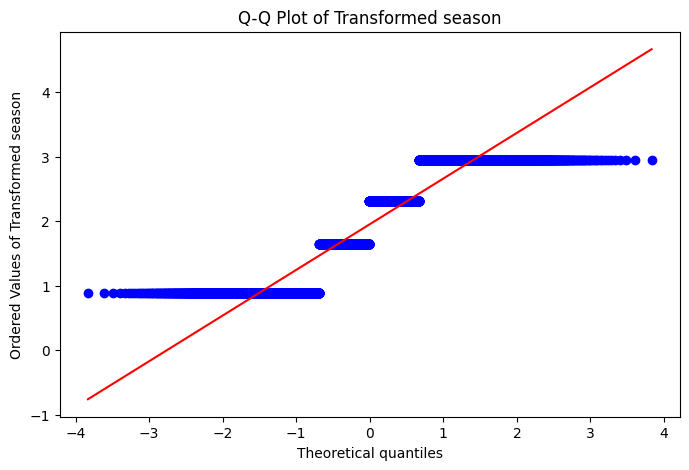

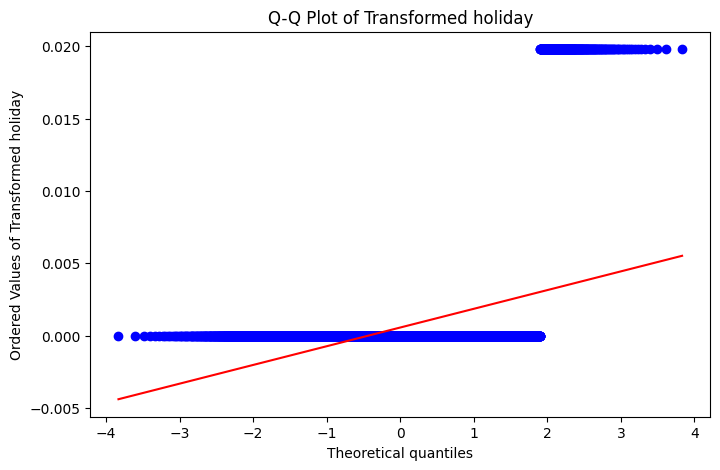

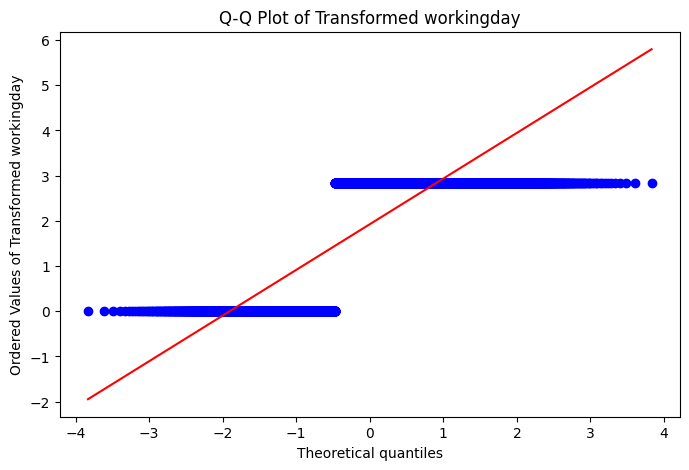

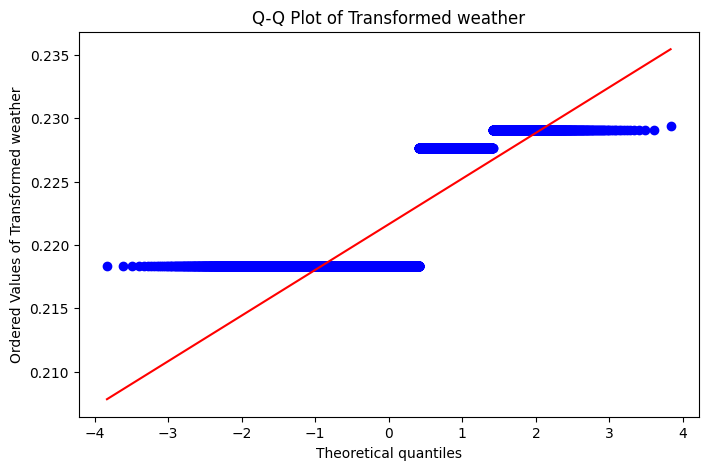

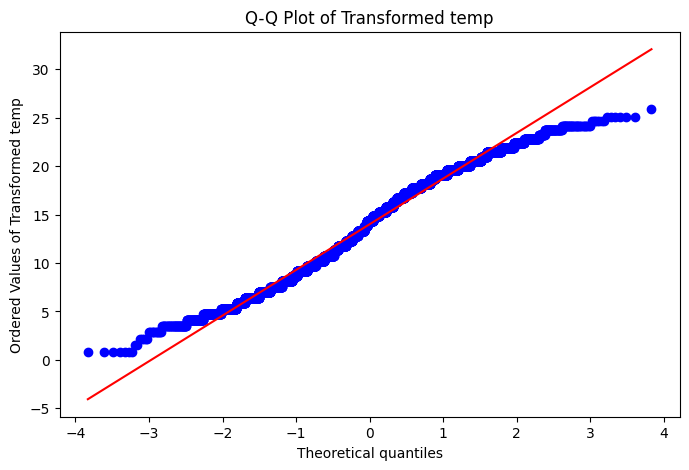

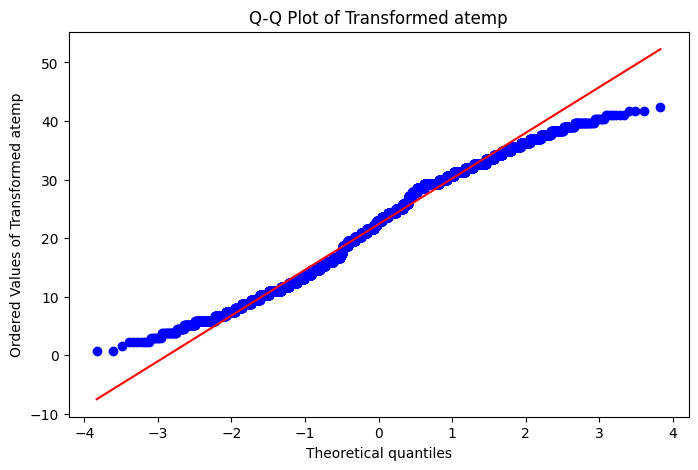

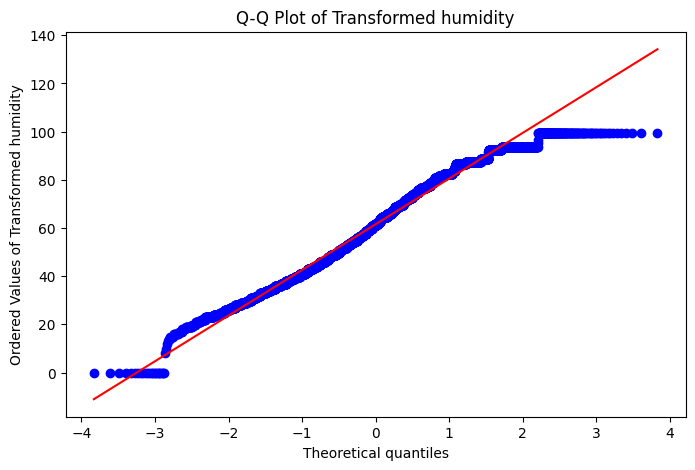

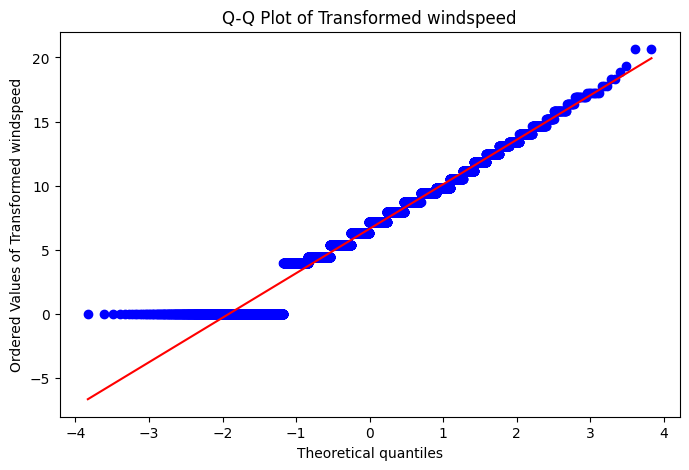

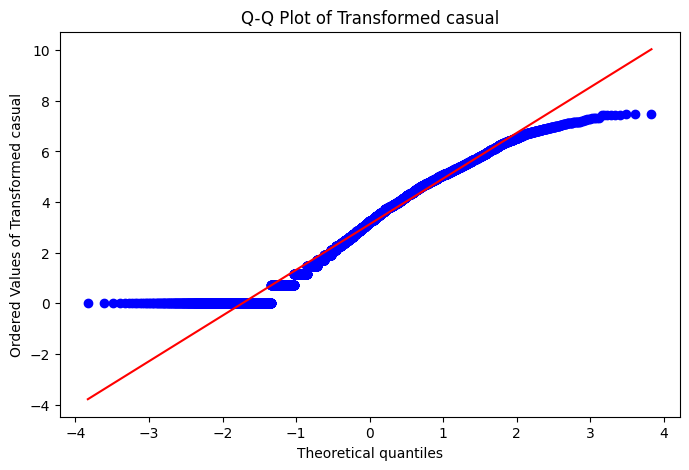

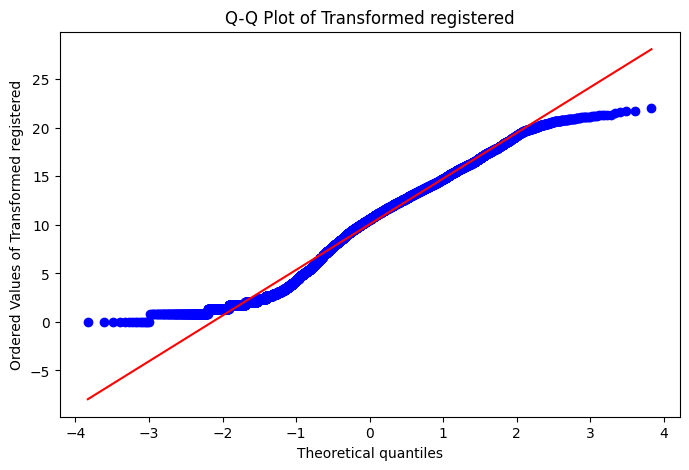

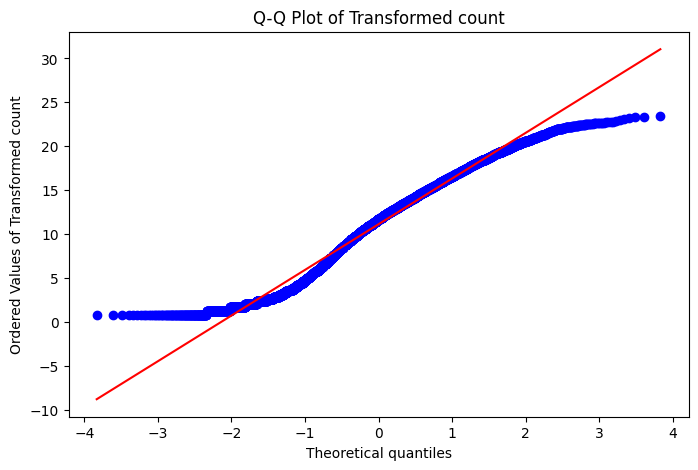

In [19]:
from scipy.stats import boxcox

transformed_data = pd.DataFrame()
for col in numerical_cols:
    transformed_col, _ = boxcox(df[col] + 1)  # Adding 1 to handle zero values
    transformed_data[col] = transformed_col

# Plot histograms of transformed data
for col in transformed_data.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(transformed_data[col], kde=True, color='skyblue', bins=20)
    plt.title(f'Histogram of Transformed {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Generate Q-Q plots of transformed data
for col in transformed_data.columns:
    plt.figure(figsize=(8, 5))
    probplot(transformed_data[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Transformed {col}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel(f'Ordered Values of Transformed {col}')
    plt.show()

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pingouin import partial_corr


# import q3data.csv as a pandas dataframe
df = pd.read_csv('q3data.csv')

df.head()

#drop the datetime column
df = df.drop('datetime', axis=1)

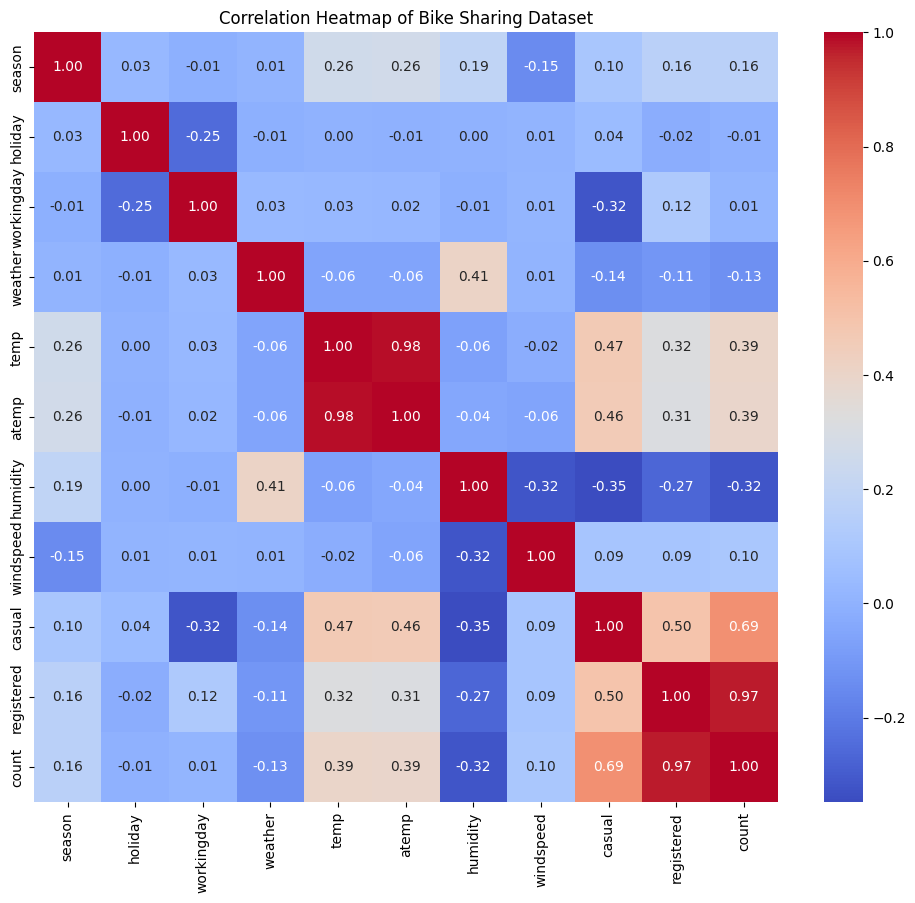

In [9]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Bike Sharing Dataset')
plt.show()



From the correlation matrix above, we notice that some variables do seem to have some sort of partial correlations (the points which have a reddish hue to them) are positively correlated. Extreme shades of blue also point to slight negative correlations. 

Variables such as Casual and Count, Registered and Count, Casual and Registered, Temp and atemp etc. have partial correlations. 

Partial correlation is a statistical technique used to measure the relationship between two variables while controlling for the influence of one or more additional variables, known as covariates or control variables. It helps to assess the unique association between two variables after removing the shared variance explained by the covariates.